In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("../input/data.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df_new = df.dropna(axis='rows', how='any')

In [7]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df_new = df_new[(df_new['Quantity']>=0) & (df_new['UnitPrice']>0)]

In [9]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
df_new['amount_spent'] = df_new['Quantity'] * df_new['UnitPrice']

In [11]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [12]:
df_new.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
amount_spent    0
dtype: int64

In [13]:
df_new = df_new.groupby('Country', as_index=False).apply(lambda x: x.sort_values(by='amount_spent', ascending=False))

In [14]:
df_new.head()

InvoiceNo StockCode      ...         Country  amount_spent
0 468139    576394     23084      ...       Australia        1718.4
  304887    563614     22940      ...       Australia        1260.0
  108007    545475     21217      ...       Australia        1074.0
  304957    563614     23314      ...       Australia        1039.0
  45541     540267     22720      ...       Australia        1020.0

[5 rows x 9 columns]

In [15]:
df_new.dtypes

InvoiceNo        object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID      float64
Country          object
amount_spent    float64
dtype: object

In [16]:
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])

In [17]:
df_new.head()

InvoiceNo StockCode      ...         Country  amount_spent
0 468139    576394     23084      ...       Australia        1718.4
  304887    563614     22940      ...       Australia        1260.0
  108007    545475     21217      ...       Australia        1074.0
  304957    563614     23314      ...       Australia        1039.0
  45541     540267     22720      ...       Australia        1020.0

[5 rows x 9 columns]

In [18]:
df_new['year'] = df_new['InvoiceDate'].dt.year
df_new['month'] = df_new['InvoiceDate'].dt.month
df_new['day'] = df_new['InvoiceDate'].dt.day

In [19]:
df_new['hour'] = df_new['InvoiceDate'].dt.hour
df_new['minute'] = df_new['InvoiceDate'].dt.minute
df_new['second'] = df_new['InvoiceDate'].dt.second

In [20]:
df_new.head()

InvoiceNo StockCode   ...   minute  second
0 468139    576394     23084   ...       32       0
  304887    563614     22940   ...       51       0
  108007    545475     21217   ...       59       0
  304957    563614     23314   ...       51       0
  45541     540267     22720   ...       12       0

[5 rows x 15 columns]

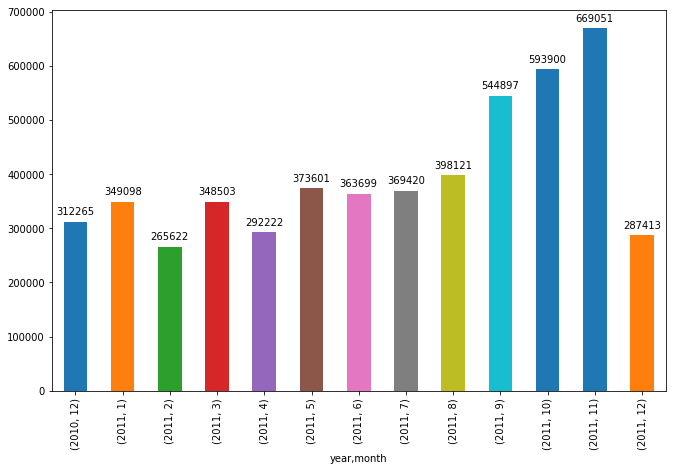

In [21]:
plt.figure(figsize=(11,7))
ax = df_new.groupby(['year', 'month'])['Quantity'].sum().plot.bar()
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

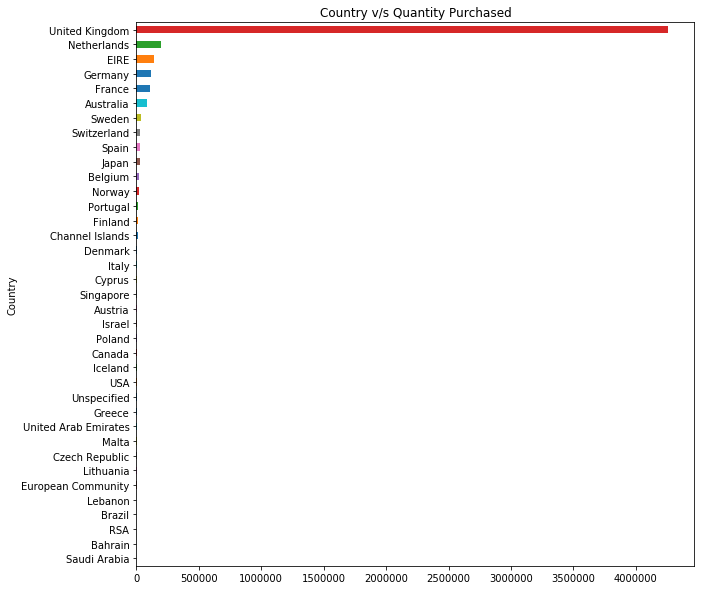

In [22]:
plt.figure(figsize=(10,10))
df_new.groupby(['Country'])['Quantity'].sum().sort_values().plot.barh(title="Country v/s Quantity Purchased")

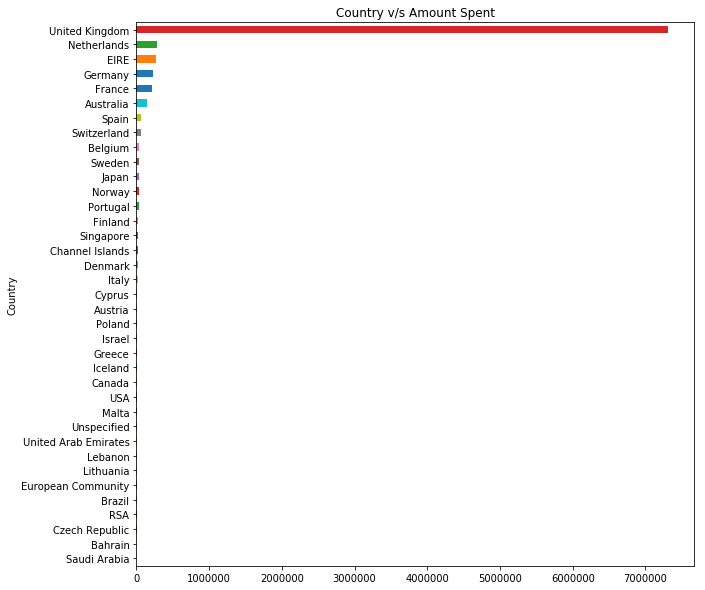

In [23]:
plt.figure(figsize=(10,10))
df_new.groupby(['Country'])['amount_spent'].sum().sort_values().plot.barh(title="Country v/s Amount Spent")

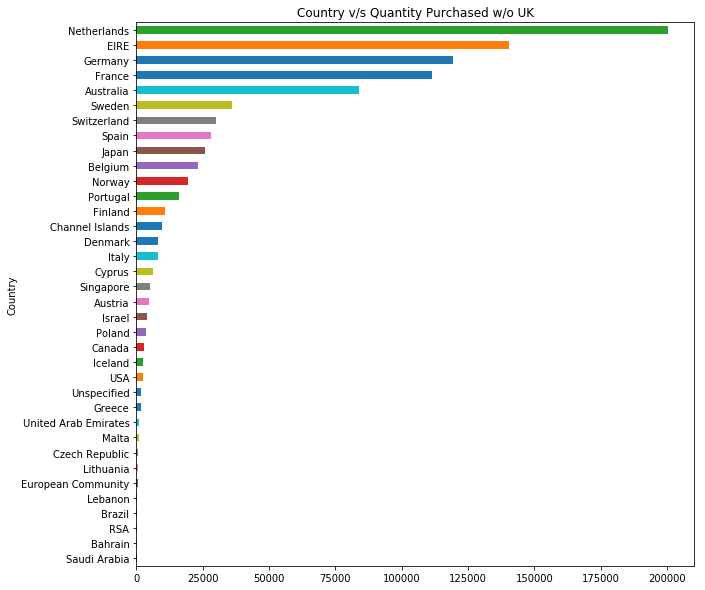

In [24]:
plt.figure(figsize=(10,10))
df_new[(df_new['Country']!='United Kingdom')].groupby(['Country'])['Quantity'].sum().sort_values().plot.barh(title="Country v/s Quantity Purchased w/o UK")

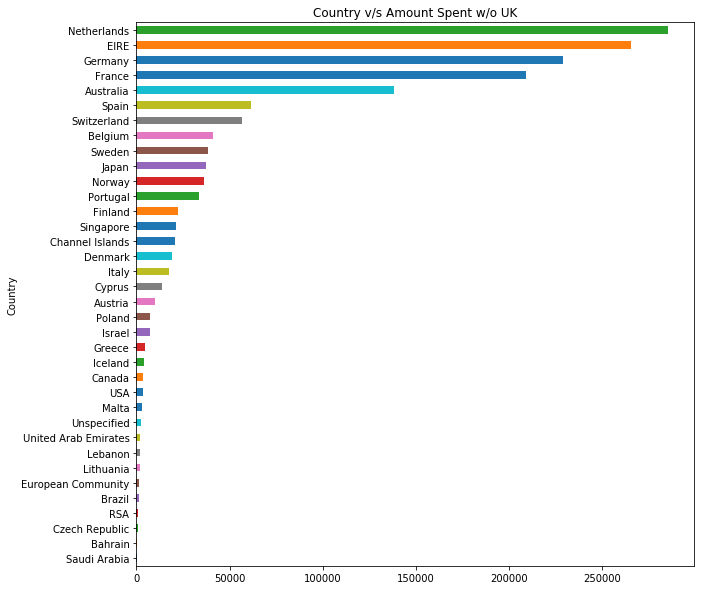

In [25]:
plt.figure(figsize=(10,10))
df_new[(df_new['Country']!='United Kingdom')].groupby(['Country'])['amount_spent'].sum().sort_values().plot.barh(title="Country v/s Amount Spent w/o UK")